#Punto 2
##En el siguiente enlace se resuelve el problema de clasificación de imágenes definido por el data ser Cifar10 usando una red neuronal convolucional
https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

##Elaborado por:
##Andrea Saavedra - 2171940
##Valentina Loaiza - 2186260

#LIBRERÍAS Y DATASET

170498071/170498071 [==============================] - 15s 0us/step


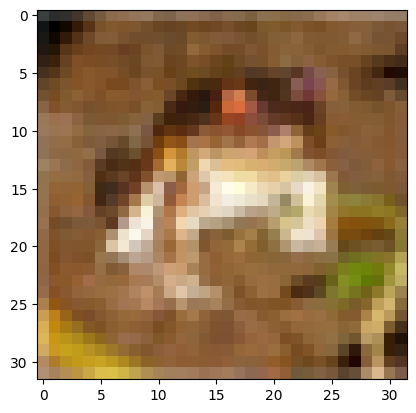

In [1]:
#Librerías
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
import matplotlib.pyplot as plt
import cv2 as cv2
import numpy as np

#Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
plt.imshow(x_train[0])

#NORMALIZACIÓN DE LOS DATOS

In [2]:
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


#ONE HOT ENCODING

In [3]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [4]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

print(input_shape)
print(num_classes)

(32, 32, 3)
10


#ARQUITECTURA DE LA RED NEURONAL CONVOLUCIONAL

In [5]:

def model():# 32x32
  model = Sequential()
  model.add(Conv2D(32,(5,5), input_shape=input_shape, activation='relu'))#28x28
  model.add(Conv2D(32,(3,3), activation='relu'))#26x26
  model.add(MaxPooling2D(pool_size=(2,2)))#13x13

  model.add(Conv2D(32,(3,3), activation='relu'))#11x11
  model.add(MaxPooling2D(pool_size=(2,2)))#5x5

  model.add(Dropout(0.3))
  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.summary()

  opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

  model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

  return model

In [6]:
model = model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0

# ENTRENAMIENTO DE LA RED

In [7]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 35, batch_size=32, shuffle=True)

Epoch 1/35
1563/1563 [==============================] - 19s 5ms/step - loss: 1.8054 - accuracy: 0.3394 - val_loss: 1.4553 - val_accuracy: 0.4850
Epoch 2/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4261 - accuracy: 0.4831 - val_loss: 1.3235 - val_accuracy: 0.5281
Epoch 3/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2710 - accuracy: 0.5455 - val_loss: 1.1531 - val_accuracy: 0.5866
Epoch 4/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1471 - accuracy: 0.5941 - val_loss: 1.0507 - val_accuracy: 0.6326
Epoch 5/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0560 - accuracy: 0.6288 - val_loss: 1.0599 - val_accuracy: 0.6330
Epoch 6/35
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9865 - accuracy: 0.6541 - val_loss: 0.9728 - val_accuracy: 0.6625
Epoch 7/35
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9322 - accuracy: 0.6732 - val_loss: 0.9726 - val_accuracy

In [8]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score)

[1.0339794158935547, 0.7013999819755554]


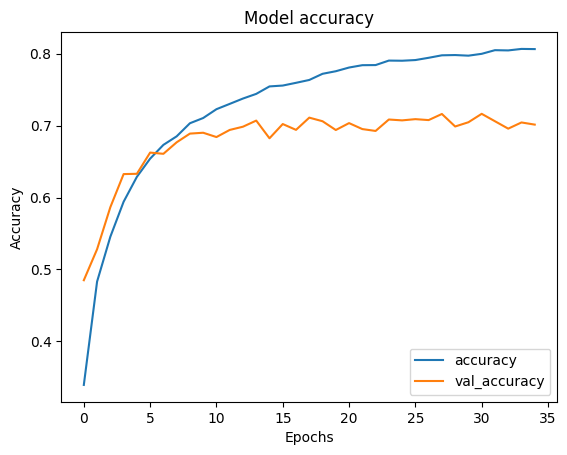

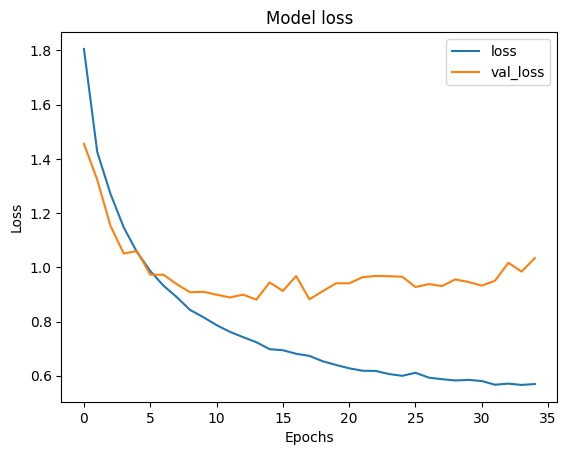

In [9]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

#MATRIZ DE CONFUSIÓN

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.11737032e-03 1.96883848e-04 1.96870733e-02 6.55331731e-01
 2.77011609e-03 1.18382995e-04 3.18441868e-01 4.66525875e-04
 1.58709867e-04 1.71134796e-03]


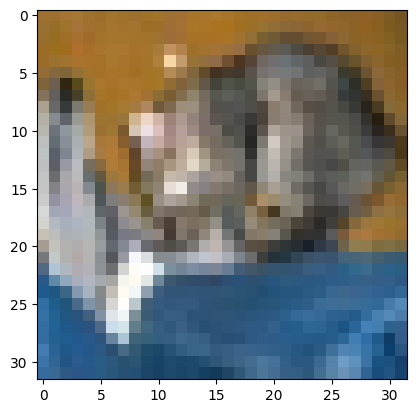

In [10]:
from sklearn.metrics import confusion_matrix

outputTest = model.predict(x_test)
print(outputTest.shape)
print(y_test[0])
print(outputTest[0])
plt.imshow(x_test[0])

In [11]:
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(outputTest, axis=1))
print(cm)

[[675  17  66  24  43  11  17  16  90  41]
 [ 23 848   7   9   6   9  16   5  31  46]
 [ 52   4 608  70  88  57  73  24  10  14]
 [ 19   5  80 504  90 162  83  30  16  11]
 [ 20   3  57  62 712  39  71  26   6   4]
 [ 13   3  69 165  55 605  38  36   7   9]
 [  5   3  43  56  28  22 829   8   3   3]
 [ 13   1  37  55 120  68  15 672   2  17]
 [ 66  22  15  24  12  12   8   4 809  28]
 [ 36  96  16  18  10  15  13  12  32 752]]


In [12]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['0', '1', '2','3', '4', '5','6', '7', '8','9']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

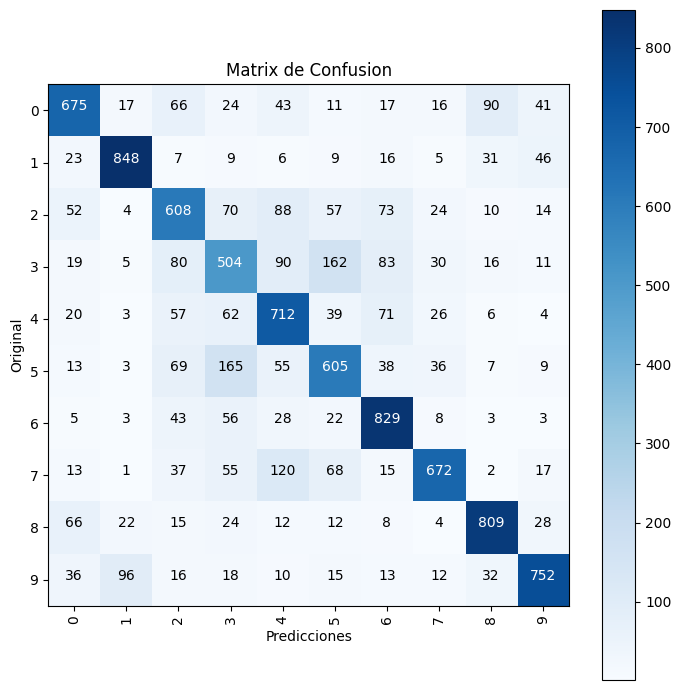

In [13]:
plot_confusion_matrix(cm, num_classes)